In [1]:
# 🎬 Scenario: Movie Streaming Platform
# A movie streaming company has collected data on 1,000 users, including:
# - Average watch time per week
# - Preferred genres (action, comedy, drama, etc.)
# - Number of devices used (TV, phone, tablet)
# - Frequency of subscription pauses or cancellations
# The company wants to group users into meaningful segments to:
# - Recommend personalized movie lists
# - Design loyalty rewards for binge‑watchers
# - Identify users at risk of canceling subscriptions
# Your Tasks
# - Apply K‑Means clustering to explore possible user segments.
# - Example clusters: “Weekend binge‑watchers,” “Casual family viewers,” “Genre loyalists.”
# - Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
# - This helps decide whether 3, 4, or 5 clusters make sense.
# - Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
# - Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”

# we have to generate our own data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
np.random.seed(42)

In [3]:
# Create dataset
data = {
    'UserID': range(1, 1001),
    'WatchTime': np.random.randint(1, 40, 1000),         # hours per week
    'GenrePreference': np.random.randint(0, 4, 1000),    # 0=Action,1=Comedy,2=Drama,3=Thriller
    'DevicesUsed': np.random.randint(1, 5, 1000),        # number of devices
    'PauseFrequency': np.random.randint(0, 6, 1000)      # subscription pauses/year
}
df = pd.DataFrame(data)
print(df)

     UserID  WatchTime  GenrePreference  DevicesUsed  PauseFrequency
0         1         39                1            3               4
1         2         29                2            4               3
2         3         15                0            3               3
3         4          8                3            4               2
4         5         21                2            2               1
..      ...        ...              ...          ...             ...
995     996         38                0            3               2
996     997          2                3            2               3
997     998          7                0            3               4
998     999         18                2            2               0
999    1000         27                0            2               3

[1000 rows x 5 columns]


In [4]:
# Step 2 – Feature Selection & Scaling
X = df[['WatchTime','GenrePreference','DevicesUsed','PauseFrequency']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

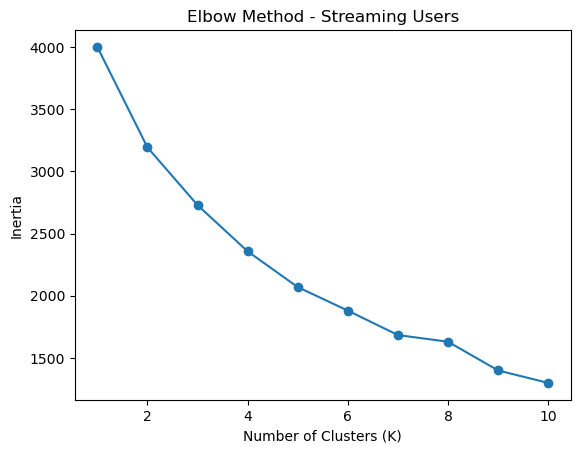

Inertia values: [4000.0, 3192.733180759169, 2728.5482653015924, 2356.971335862034, 2069.5788858761753, 1880.3501505683296, 1683.9321480105014, 1630.378872596441, 1399.4265203053224, 1299.2548715922333]


In [5]:
# Step 3 – Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Streaming Users")
plt.show()
print("Inertia values:", inertia)

In [6]:
# Step 4 – Silhouette Score
sil_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

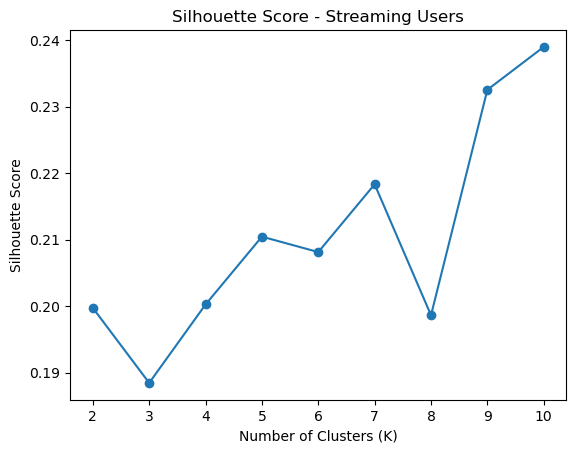

In [7]:
plt.figure()
plt.plot(k_range_sil, sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score - Streaming Users")
plt.show()

In [8]:
best_k = k_range_sil[np.argmax(sil_scores)]
print("Best K based on Silhouette Score:", best_k)
print("Best Silhouette Score:", max(sil_scores))

Best K based on Silhouette Score: 10
Best Silhouette Score: 0.2389968904085992
